![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

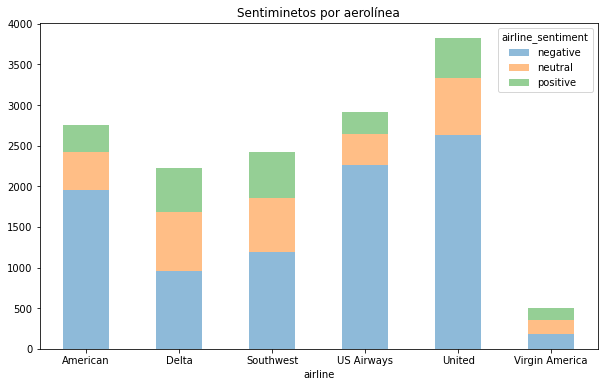

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
from sklearn import metrics

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(9808,)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

RandomForest Classifier
Accuracy: 0.7725579470198676
 
              precision    recall  f1-score   support

          -1       0.77      0.97      0.86      3085
           0       0.70      0.39      0.50       984
           1       0.85      0.48      0.61       763

    accuracy                           0.77      4832
   macro avg       0.78      0.61      0.66      4832
weighted avg       0.77      0.77      0.75      4832



<AxesSubplot:>

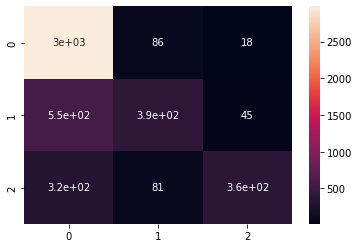

In [ ]:
# Celda 1

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_dtm, y_train)

y_predict = clf.predict(vect.transform(X_test))
acc_cv=metrics.accuracy_score(y_test, y_predict)
print("RandomForest Classifier")
print(f'Accuracy: { accuracy_score(y_test, y_predict)}\n ')
print(classification_report(y_test, y_predict))

sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)

Con el modelo estimado se calcula un accuracy de 0.7725.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

RandomForest Classifier
Accuracy: 0.7667632450331126
 
              precision    recall  f1-score   support

          -1       0.82      0.89      0.86      3085
           0       0.57      0.50      0.53       984
           1       0.73      0.60      0.66       763

    accuracy                           0.77      4832
   macro avg       0.71      0.66      0.68      4832
weighted avg       0.76      0.77      0.76      4832



<AxesSubplot:>

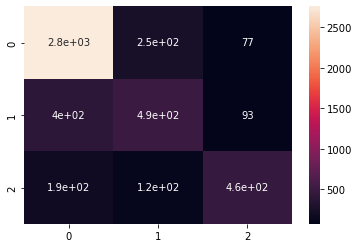

In [ ]:
# Celda 2

vect = CountVectorizer(stop_words='english')
X_train_dtm = vect.fit_transform(X_train)

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_dtm, y_train)

y_predict = clf.predict(vect.transform(X_test))
acc_st=metrics.accuracy_score(y_test, y_predict)
print("RandomForest Classifier")
print(f'Accuracy: { accuracy_score(y_test, y_predict)}\n ')
print(classification_report(y_test, y_predict))

sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)

Con el modelo estimado se calcula un accuracy de 0.7667, más bajo que el estimado con CountVectorizer sin parámetros.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 3
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re

def preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    
    # stem words
    words=re.split("\\s+",text)
    
    lemma_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(lemma_words)


RandomForest Classifier
Accuracy: 0.773385761589404
 
              precision    recall  f1-score   support

          -1       0.78      0.97      0.86      3085
           0       0.69      0.40      0.51       984
           1       0.84      0.48      0.61       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.66      4832
weighted avg       0.77      0.77      0.75      4832



<AxesSubplot:>

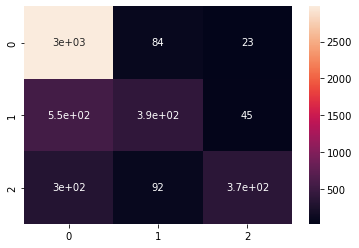

In [ ]:
vect = CountVectorizer(preprocessor=preprocessor)
X_train_dtm = vect.fit_transform(X_train)

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_dtm, y_train)

y_predict = clf.predict(vect.transform(X_test))
acc_lm=metrics.accuracy_score(y_test, y_predict)
print("RandomForest Classifier")
print(f'Accuracy: { accuracy_score(y_test, y_predict)}\n ')
print(classification_report(y_test, y_predict))

sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)

Con el modelo estimado se calcula un accuracy de 0.7733, más alto que el estimado con CountVectorizer sin parámetros.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

RandomForest Classifier
Accuracy: 0.7688327814569537
 
              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      3085
           0       0.59      0.49      0.54       984
           1       0.72      0.60      0.65       763

    accuracy                           0.77      4832
   macro avg       0.71      0.66      0.68      4832
weighted avg       0.76      0.77      0.76      4832



<AxesSubplot:>

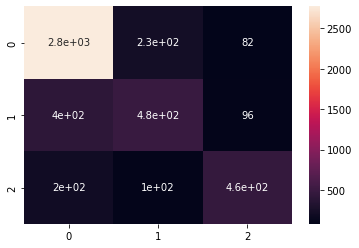

In [ ]:
# Celda 4

vect = CountVectorizer(preprocessor=preprocessor,
                       stop_words='english')

X_train_dtm = vect.fit_transform(X_train)

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_dtm, y_train)

y_predict = clf.predict(vect.transform(X_test))
acc_mt=metrics.accuracy_score(y_test, y_predict)
print("RandomForest Classifier")
print(f'Accuracy: { accuracy_score(y_test, y_predict)}\n ')
print(classification_report(y_test, y_predict))

sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)


Con el modelo estimado se calcula un accuracy de 0.7688, más bajo que el estimado con lematización y más alto que el de stop words.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

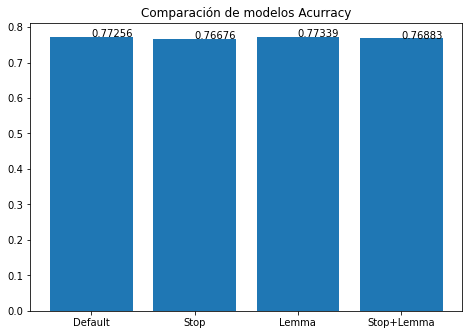

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos Acurracy")
ejeX = ['Default', 'Stop' ,'Lemma', 'Stop+Lemma']
ejeY = np.round([acc_cv,acc_st,acc_lm,acc_mt],5)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

De acuerdo con los resultados de la métrica accuracy, se puede observar que el modelo estimado por Random Forest y lematización es aquel que mejor desempeño tiene con el mayor accuracy. En contraste, el modelo estimado por Random Forest y stopwords es aquel con el peor desempeño con el menor accuracy. 

La mayor ventaja de la lematización consiste en conservar el sentido de las palabras dentro del texto al reducirla a la forma que se encuentra dentro del diccionario. Por otro lado, la desventaja de stopwords es la posible pérdida de palabras que podrían aportar al sentido del texto, en especial para análisis de sentimientos puede llegar a afectar el contexto del texto, por ejemplo al remover palabras de negación (como la palabra no).

Además se puede observar que la base de datos está desbalanceada con menos casos de tweets neutros y positivos, por lo cual se observa que, en general, los modelos estimados no logran una alta precisión en la clasificación de estas dos clases.